In [ ]:
from huggingface_hub import notebook_login

notebook_login()

/home/ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
Using custom data configuration elael--mtg_diffusion-74d7c6ec08096afc
Reusing dataset parquet (/home/ubuntu/.cache/huggingface/datasets/elael___parquet/elael--mtg_diffusion-74d7c6ec08096afc/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)


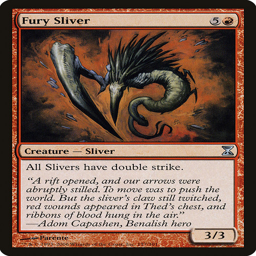

a dragon with a long tail and sharp teeth


In [1]:
# Check the dataset
from datasets import load_dataset
from datasets import Dataset, Image as DsImage
ds = load_dataset("elael/mtg_diffusion", split="train", use_auth_token=True).cast_column("image", DsImage())
sample = ds[0]
display(sample["image"].resize((256, 256)))
print(sample["text"])

In [2]:
from huggingface_hub import hf_hub_download
ckpt_path = hf_hub_download(repo_id="CompVis/stable-diffusion-v-1-4-original", filename="sd-v1-4-full-ema.ckpt", use_auth_token=True)


In [3]:
print(ckpt_path)

/home/ubuntu/.cache/huggingface/hub/models--CompVis--stable-diffusion-v-1-4-original/snapshots/f0bb45b49990512c454cf2c5670b0952ef2f9c71/sd-v1-4-full-ema.ckpt


In [4]:
BATCH_SIZE = 2
N_GPUS = 8
ACCUMULATE_BATCHES = 2

gpu_list = ",".join((str(x) for x in range(N_GPUS))) + ","
print(f"Using GPUs: {gpu_list}")


Using GPUs: 0,1,2,3,4,5,6,7,


In [ ]:
# Run training
!(python main.py \
    -t \
    --base configs/stable-diffusion/mtg.yaml \
    --gpus 0,1,2,3,4,5,6,7, \
    --scale_lr False \
    --num_nodes 1 \
    --check_val_every_n_epoch 10 \
    --finetune_from '/home/ubuntu/mtg-stable-diffusion/bk_logs/2022-12-29T18-15-09_mtg/checkpoints/epoch=000009.ckpt' \
    data.params.batch_size=2 \
    lightning.trainer.accumulate_grad_batches=2 \
    data.params.validation.params.n_gpus=8 \
)


In [12]:
# Run the model
!(python scripts/txt2img.py \
    --prompt 'Criminal struggle, a rare red enchantment showing a queen blowin fire with a black border in a new-style frame.' \
    --outdir 'outputs/generated_mtg_6' \
    --scale  10 \
    --H 704 --W 512 \
    --n_samples 4 \
    --config 'configs/stable-diffusion/mtg.yaml' \
    --ckpt 'logs/2022-12-30T00-50-14_mtg/checkpoints/last.ckpt')


/home/ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
Global seed set to 42
Loading model from logs/2022-12-30T00-50-14_mtg/checkpoints/last.ckpt
Global Step: 2000
LatentDiffusion: Running in eps-prediction mode
DiffusionWrapper has 859.52 M params.
Keeping EMAs of 688.
making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 4, 32, 32) = 4096 dimensions.
making attention of type 'vanilla' with 512 in_channels
Some weights of the model checkpoint at openai/clip-vit-large-patch14 were not used when initializing CLIPTextModel: ['vision_model.encoder.layers.2.layer_norm1.bias', 'vision_model.encoder.layers.8.self_attn.k_proj.weight', 'vision_model.encoder.layers.21.layer_norm2.weight', 'vision_model.encoder.layers.17.self_attn.out_proj.weight', 'vision_model.en

In [9]:
# Run the model
!(python scripts/txt2img.py \
    --prompt 'Light from Within, a uncommon artifact showing a dark elf kiling a dragon with a black border and old-style frame.' \
    --outdir 'outputs/generated_mtg_3' \
    --H 704 --W 512 \
    --n_samples 4 \
    --config 'configs/stable-diffusion/mtg.yaml' \
    --ckpt 'logs/2022-12-30T00-50-14_mtg/checkpoints/last.ckpt')


/home/ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
Global seed set to 42
Loading model from logs/2022-12-30T00-50-14_mtg/checkpoints/last.ckpt
Global Step: 2000
LatentDiffusion: Running in eps-prediction mode
DiffusionWrapper has 859.52 M params.
Keeping EMAs of 688.
making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 4, 32, 32) = 4096 dimensions.
making attention of type 'vanilla' with 512 in_channels
Some weights of the model checkpoint at openai/clip-vit-large-patch14 were not used when initializing CLIPTextModel: ['vision_model.encoder.layers.3.layer_norm1.weight', 'vision_model.encoder.layers.21.layer_norm2.weight', 'vision_model.encoder.layers.5.layer_norm2.bias', 'vision_model.encoder.layers.13.self_attn.v_proj.weight', 'vision_model.encoder.l